# 1 Brownian motion

## 1 1-D simple random walk

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# implementation of tossing a fair coin, using a uniform distribution
p = 0.5
if np.random.uniform() > 1 - p:
    coin = 'Head'
else:
    coin = 'Tail'
print(coin)

# this is an example of Smirov transform, which is a method to generate a random number using a uniform dist. w.r.t. aa given C.D.F.

Tail


In [3]:
# tossing 10 times
p = 0.5
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 'H'
    else:
        coin = 'T'
    print(coin, end='\t')

T	H	H	T	T	T	T	T	H	H	

In [4]:
# tossing 10 times & when p = 0.1: note that T rules
p = 0.1
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 'H'
    else:
        coin = 'T'
    print(coin, end='\t')

T	T	T	T	H	T	T	T	T	T	

In [5]:
# tossing 10 times & when p = 0.9: H rules
p = 0.9
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 'H'
    else:
        coin = 'T'
    print(coin, end='\t')

H	T	H	H	H	H	H	H	H	H	

In [6]:
# enumerate this by replacing H, T with 1, -1, respectively.
p = 0.5
lst = []
position = [0]
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
print(position)

[0, -1, -2, -1, 0, -1, 0, -1, -2, -1, -2]


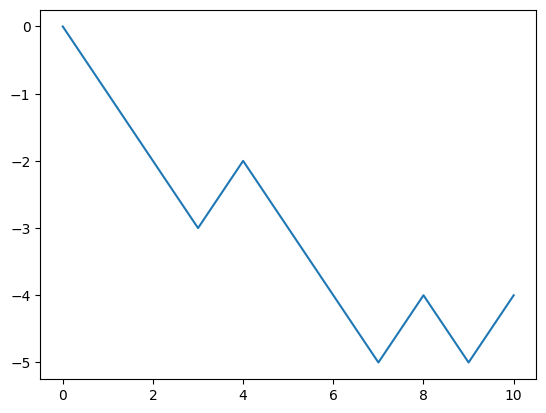

In [7]:
# let's plot this
p = 0.5
lst = []
position = [0]
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
plt.plot(position)

This is so-called, *`1-D simple random walk`*:

$x_i$ are i.i.d. and 
$x_i = \begin{cases}
            1 (\text{with probability} \frac{1}{2}) \\
            -1 (\text{with probability} \frac{1}{2})
        \end{cases}$
        
\begin{align*}
    S_0 &= 0 \\
    S_n &= \sum_{i=1}^n x_i
\end{align*}

Here, Var($x_i$) = 1, 

E[$S_n$]=0, 

Var($S_n$) = Var($\sum_{i=1}^n x_i$) = Cov($\sum_{j=1}^n x_j, \sum_{j=1}^n x_j$) = $\sum_{i=j}$ Var($x_i$) + $\sum_{i \neq j}$ Cov($x_i, x_j$) = $\sum_{i=j} 1$ + 0 = $n$.

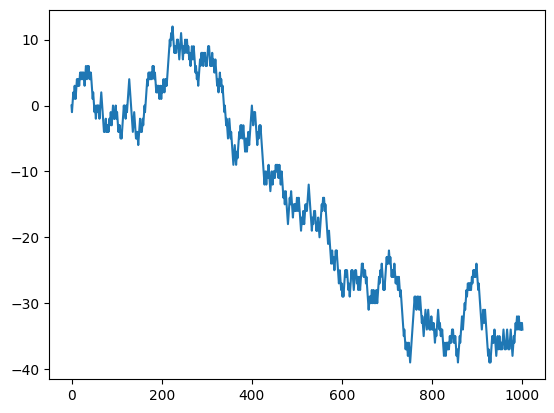

In [8]:
# iterating 1000 times
p = 0.5
lst = []
position = [0]
for i in range(1000):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
plt.plot(position)

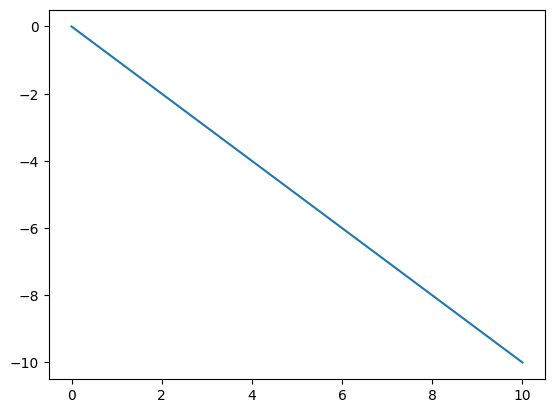

In [9]:
# when p = 0.1, downtrend governs the dynamics
p = 0.1
lst = []
position = [0]
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
plt.plot(position)

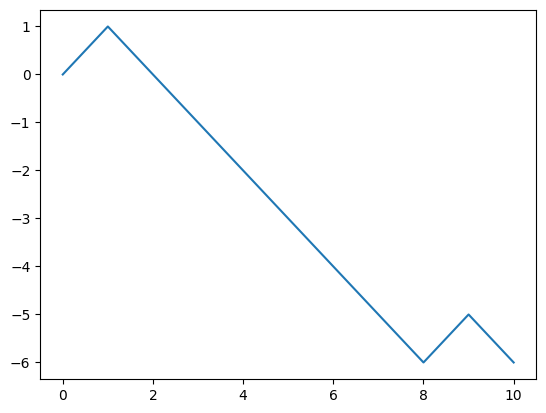

In [10]:
# when p = 0.2
p = 0.2
lst = []
position = [0]
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
plt.plot(position)

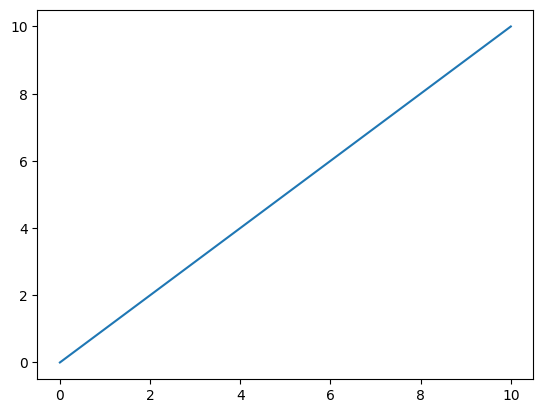

In [11]:
# when p = 0.8,, uptrend governs the dynamics
p = 0.8
lst = []
position = [0]
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
plt.plot(position)

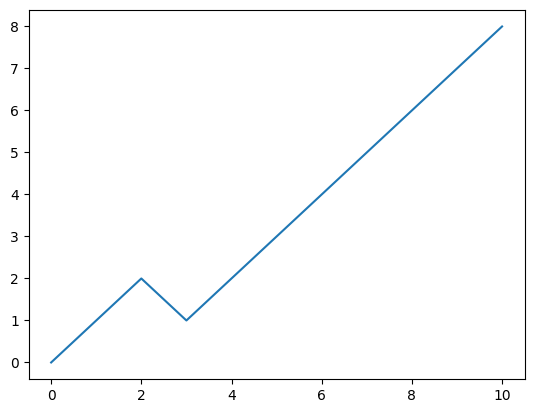

In [12]:
# of course, p = 0.5 case is the most fair one
p = 0.5
lst = []
position = [0]
for i in range(10):
    if np.random.uniform() > 1 - p:
        coin = 1
    else:
        coin = -1
    # lst.append(coin)
    position.append(position[-1] + coin)
plt.plot(position)

## 2. Brownian motion
Think of a 2D-plane w/ time on the x-axis and the Brownian motion $B_t$ on the y-axis:

divide the unit interval $[0, 1]$ into n uniform intervals. Iterate this division until time $t$, thus we are now considering
$$
    B_t = \sum_{i=1}^{nt} x_i
$$
, which can be regarded as $nt$-times coin flip.

Then $E(B_t) = 0, Var(B_t) = nt$. However, instead, we want $Var(B_t)$ to be $t$.

So scale it by $\alpha = \frac{1}{\sqrt{n}}$:
$$
    B_t = \frac{\sum_{i=1}^{nt} x_i}{\sqrt{n}}
$$

This makes
$$
    E[B_1] = 0, \quad \text{ and } \quad Var(B_1) = 1,
$$

which again implies
$$
    E[B_t] = 0, \quad \text{ and } \quad Var(B_t) = t.
$$

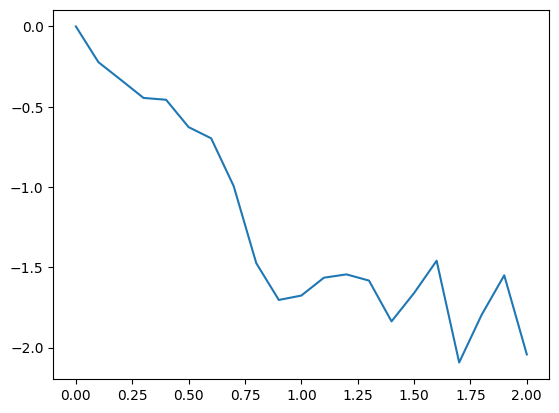

In [13]:
# instead of implementing the expression of B_t above, we use normal distribution:
n = 10
t = 2
n_sim = 3  # number of Brownian motions(simulations)

z = np.random.normal(loc=0.0, scale=1.0, size=(n_sim, n * t))
B_ = np.cumsum(z, axis=1) / np.sqrt(n)
Head = np.zeros([n_sim, 1])  # one may call this as 'start'
B = np.concatenate((Head, B_), axis=1)
time = np.linspace(0, t, n * t + 1)
plt.plot(time, B[0, :]);

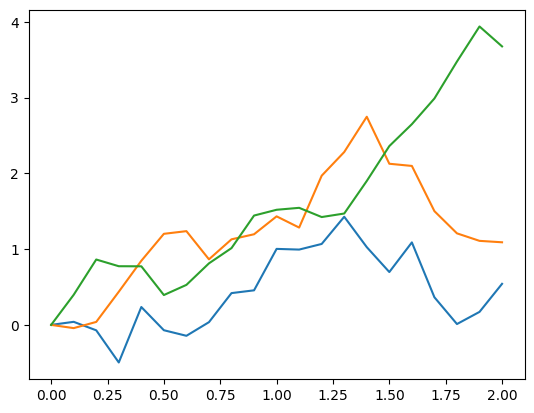

In [14]:
# plotting all 3=n_sim Brownian motions
n = 10
t = 2
n_sim = 3  # number of Brownian motions(simulations)

z = np.random.normal(loc=0.0, scale=1.0, size=(n_sim, n * t))
B_ = np.cumsum(z, axis=1) / np.sqrt(n)
Head = np.zeros([n_sim, 1])  # one may call this as 'start'
B = np.concatenate((Head, B_), axis=1)
time = np.linspace(0, t, n * t + 1)
plt.plot(time, B.T);

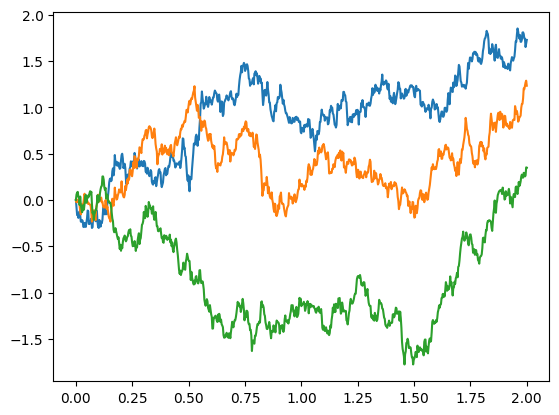

In [15]:
# plotting for 1-year data
n = 365
t = 2
n_sim = 3  # number of Brownian motions(simulations)

z = np.random.normal(loc=0.0, scale=1.0, size=(n_sim, n * t))
B_ = np.cumsum(z, axis=1) / np.sqrt(n)
Head = np.zeros([n_sim, 1])  # one may call this as 'start'
B = np.concatenate((Head, B_), axis=1)
time = np.linspace(0, t, n * t + 1)
plt.plot(time, B.T);

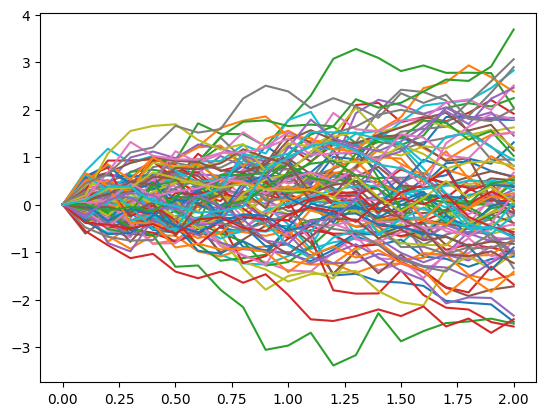

In [16]:
# plotting all 3=n_sim Brownian motions w/ 100 simulations
n = 10
t = 2
n_sim = 100  # number of Brownian motions(simulations)

z = np.random.normal(loc=0.0, scale=1.0, size=(n_sim, n * t))
B_ = np.cumsum(z, axis=1) / np.sqrt(n)
Head = np.zeros([n_sim, 1])  # one may call this as 'start'
B = np.concatenate((Head, B_), axis=1)
time = np.linspace(0, t, n * t + 1)
plt.plot(time, B.T);

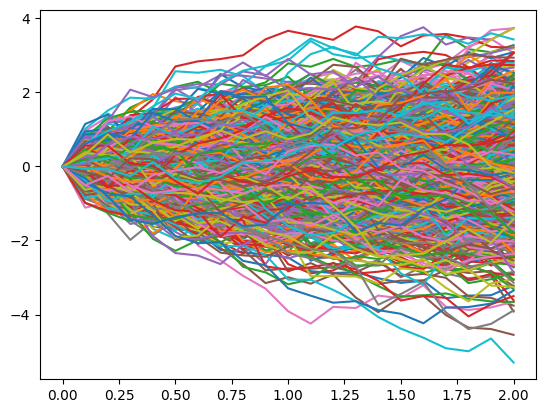

In [17]:
# plotting all 3=n_sim Brownian motions w/ 1000 simulations
n = 10
t = 2
n_sim = 1000  # number of Brownian motions(simulations)

z = np.random.normal(loc=0.0, scale=1.0, size=(n_sim, n * t))
B_ = np.cumsum(z, axis=1) / np.sqrt(n)
Head = np.zeros([n_sim, 1])  # one may call this as 'start'
B = np.concatenate((Head, B_), axis=1)
time = np.linspace(0, t, n * t + 1)
plt.plot(time, B.T);

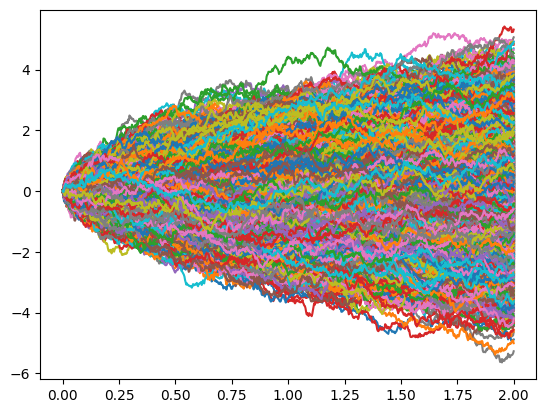

In [18]:
# plotting all 3=n_sim Brownian motions w/ 10000 simulations
n = 365
t = 2
n_sim = 10000  # number of Brownian motions(simulations)

z = np.random.normal(loc=0.0, scale=1.0, size=(n_sim, n * t))
B_ = np.cumsum(z, axis=1) / np.sqrt(n)
Head = np.zeros([n_sim, 1])  # one may call this as 'start'
B = np.concatenate((Head, B_), axis=1)
time = np.linspace(0, t, n * t + 1)
plt.plot(time, B.T);

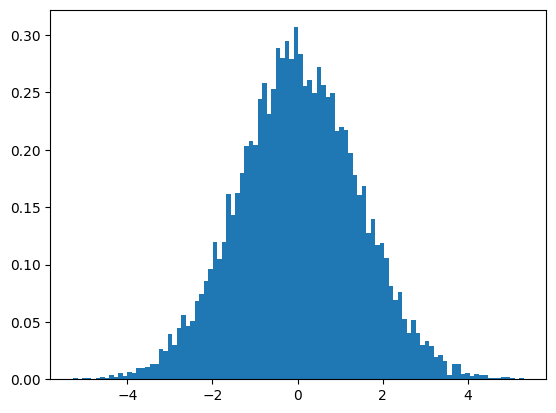

In [19]:
# does B_2 really have 0 and 2 as its expectation and variance, respectively?
plt.hist(B[:, -1], bins=100, density=True);

((100,), (101,))

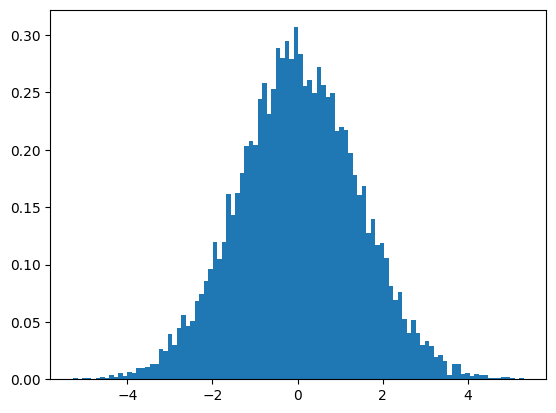

In [22]:
n_hist, bins, _ = plt.hist(B[:, -1], bins=100, density=True);
n_hist.shape, bins.shape  # height, location

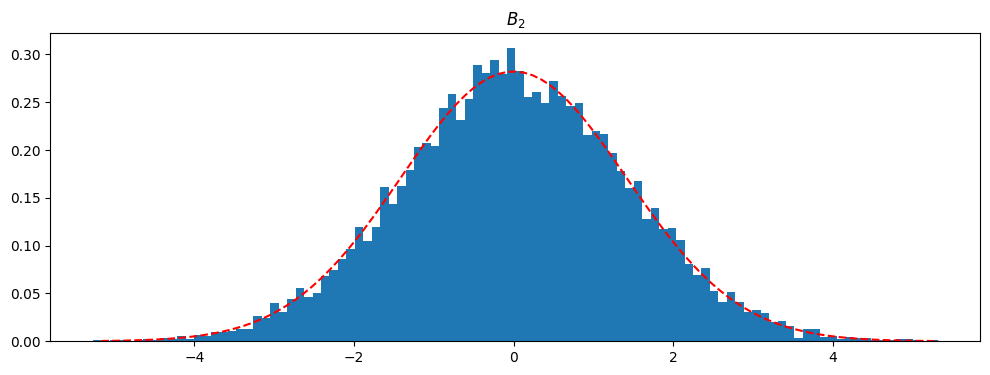

In [30]:
import scipy.stats as st  # for plotting density functions
fix, ax = plt.subplots(1, 1, figsize=(12, 4))
n_hist, bins, _ = ax.hist(B[:, -1], bins=100, density=True);

x_fig = bins[1:]
y_fig = st.norm(loc=0, scale=np.sqrt(2)).pdf(x_fig)  # x_fig and y_fig for comparison with B_2

ax.plot(x_fig, y_fig, '--r')
ax.set_title('$B_2$')
plt.show()